# Arcpy

- Comes with ArcGIS Desktop (ArcMap) and ArcGIS Pro.
- Designed for geoprocessing, spatial analysis, and automation within ArcGIS.
- Requires a licensed ArcGIS installation to run.
- Used mainly for working with local GIS data (e.g., shapefiles, geodatabases).

## Arcpy Modules

 In ArcPy, functionality is organized into [modules](https://pro.arcgis.com/en/pro-app/latest/arcpy/main/arcgis-pro-arcpy-reference.htm)

 What is the [Data Access module](https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/what-is-the-data-access-module-.htm)

In [5]:
import pandas as pd
from arcgis import GIS
import arcpy

In [2]:
gis = GIS()
basemap = gis.map('USA')
basemap.zoom = 4
basemap

Map(center=[4778944.360468395, -11066784.785637997], extent={'xmin': -16196386.92139204, 'ymin': -745449.92509…

## Exercise 01: Change Focus Area

Add city before US

In [3]:
gis = GIS()
basemap = gis.map('Worcester, USA')
basemap.zoom = 4
basemap

Map(center=[5200324.6174243605, -7992988.638769131], extent={'xmin': -8001114.96159704, 'ymin': 5189350.575127…

## Spatial enabled DataFrame

The [Spatially enabled DataFrame](https://developers.arcgis.com/python/latest/guide/introduction-to-the-spatially-enabled-dataframe/) adds "spatial abilities" into the popular Pandas DataFrame by inserting a custom namespace called spatial. This namespace (also known as accessor) allows us to use Pandas operations on both the non-spatial and spatial columns. With SeDF, you can now easily manipulate geometric and other attribute data.

### Set up current work directory

In [6]:
arcpy.env.workspace = 'E:\\Clark\\Spring2025\\Github_Courses\\LargeFiles_geog386\\docs\\Lectures\\Week05_arcpy'
arcpy.env.workspace

'E:\\Clark\\Spring2025\\Github_Courses\\LargeFiles_geog386\\docs\\Lectures\\Week05_arcpy'

### List files in current work directory

[ListFiles](https://pro.arcgis.com/en/pro-app/latest/arcpy/functions/listfiles.htm)

In [7]:
# List file that end with .shp
arcpy.ListFiles('*.shp')

['2024_Vehicle_Crash.shp', 'zip_Worcester.shp']

In [15]:
sedf = pd.DataFrame.spatial.from_featureclass("2024_Vehicle_Crash")

In [9]:
type(sedf)

pandas.core.frame.DataFrame

## Exercise 01: Get first 5 rows from sedf

In [14]:
sedf.head(n = 5)

,FID,OBJECTID,CRASH_NUMB,CITY_TOWN_,CRASH_DATE,CRASH_DA_1,CRASH_STAT,CRASH_SEVE,MAX_INJR_S,NUMB_VEHC,...,DRIVER_VIO,NON_MTRS_3,NON_MTRS_4,NON_MTRS_5,NON_MTRS_6,NON_MTRS_7,NON_MTRS_8,TRAFFIC_CO,SHAPE_1,SHAPE
0,0,5015146,5344998,WORCESTER,01/05/2024,2024-01-05,Open,Property damage only (none injured),No Apparent Injury (O),2,...,"V1: (90-20-B),(90-7-A),(720 906-B) / V2: (90-9-B)",,,,,,,,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
1,1,5015146,5344998,WORCESTER,01/05/2024,2024-01-05,Open,Property damage only (none injured),No Apparent Injury (O),2,...,"V1: (90-20-B),(90-7-A),(720 906-B) / V2: (90-9-B)",,,,,,,,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
2,2,5015832,5345091,WORCESTER,01/07/2024,2024-01-07,Open,Property damage only (none injured),No Apparent Injury (O),2,...,,,,,,,,,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
3,3,5015832,5345091,WORCESTER,01/07/2024,2024-01-07,Open,Property damage only (none injured),No Apparent Injury (O),2,...,,,,,,,,,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
4,4,5016653,5345778,WORCESTER,01/02/2024,2024-01-02,Open,Property damage only (none injured),No Apparent Injury (O),3,...,,,,,,,,,,"{""x"": 175639.38759999722, ""y"": 891405.46480000..."


## Visualizaing data with the Spatially Enabled Dataframe

In [10]:
sedf.spatial.plot()

Map(extent={'spatialReference': {'wkid': 26986, 'latestWkid': 26986}, 'xmin': 168938.40630000085, 'ymin': 8845…

## Exercise: Specify map_widget in plot()

You can quickly visualize the points by calling the plot() method off the DataFrame's spatial accessor and passing the map you created above

You can use [map_widget](https://developers.arcgis.com/python/latest/api-reference/arcgis.features.toc.html#arcgis.features.GeoAccessor.plot) specify the map to display the data

In [13]:
print(sedf.spatial.plot.__doc__)



        The ``plot`` draws the data on a map. The user can describe in simple terms how to
        renderer spatial data using symbol.


        ======================      =========================================================
        **Explicit Argument**       **Description**
        ----------------------      ---------------------------------------------------------
        map_widget                  optional ``Map`` object. This is the map to display
                                    the data on.
        ----------------------      ---------------------------------------------------------
        renderer                    optional renderer dataclass. This can be created from the
                                    renderers module in the arcgis.map module.
        ======================      =========================================================

        


In [14]:
import inspect
print(inspect.getsource(sedf.spatial.plot))

    def plot(self, map_widget=None, **kwargs):
        """

        The ``plot`` draws the data on a map. The user can describe in simple terms how to
        renderer spatial data using symbol.


        ======================      =========================================================
        **Explicit Argument**       **Description**
        ----------------------      ---------------------------------------------------------
        map_widget                  optional ``Map`` object. This is the map to display
                                    the data on.
        ----------------------      ---------------------------------------------------------
        renderer                    optional renderer dataclass. This can be created from the
                                    renderers module in the arcgis.map module.
        ======================      =========================================================

        """
        from ._viz.mapping import plot

        # sm

In [11]:
sedf.spatial.plot(map_widget = basemap, color = 'blue')
basemap

Map(center=[-71.80223860000001, 42.262159859526435], extent={'spatialReference': {'latestWkid': 3857, 'wkid': …

In [17]:
sedf.head()

,FID,OBJECTID,CRASH_NUMB,CITY_TOWN_,CRASH_DATE,CRASH_DA_1,CRASH_STAT,CRASH_SEVE,MAX_INJR_S,NUMB_VEHC,...,DRIVER_VIO,NON_MTRS_3,NON_MTRS_4,NON_MTRS_5,NON_MTRS_6,NON_MTRS_7,NON_MTRS_8,TRAFFIC_CO,SHAPE_1,SHAPE
0,0,5015146,5344998,WORCESTER,01/05/2024,2024-01-05,Open,Property damage only (none injured),No Apparent Injury (O),2,...,"V1: (90-20-B),(90-7-A),(720 906-B) / V2: (90-9-B)",,,,,,,,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
1,1,5015146,5344998,WORCESTER,01/05/2024,2024-01-05,Open,Property damage only (none injured),No Apparent Injury (O),2,...,"V1: (90-20-B),(90-7-A),(720 906-B) / V2: (90-9-B)",,,,,,,,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
2,2,5015832,5345091,WORCESTER,01/07/2024,2024-01-07,Open,Property damage only (none injured),No Apparent Injury (O),2,...,,,,,,,,,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
3,3,5015832,5345091,WORCESTER,01/07/2024,2024-01-07,Open,Property damage only (none injured),No Apparent Injury (O),2,...,,,,,,,,,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
4,4,5016653,5345778,WORCESTER,01/02/2024,2024-01-02,Open,Property damage only (none injured),No Apparent Injury (O),3,...,,,,,,,,,,"{""x"": 175639.38759999722, ""y"": 891405.46480000..."


### SHAPE info

In [21]:
# Check the column and row in sedf
sedf.shape

(6802, 151)

In [22]:
sedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6802 entries, 0 to 6801
Columns: 151 entries, FID to SHAPE
dtypes: Float64(4), Int32(9), Int64(1), datetime64[us](1), geometry(1), string(135)
memory usage: 7.7 MB


### SHAPE geometry column
#### The SHAPE column holds the geometry for each record in the DataFrame. 

In [23]:
sedf.spatial.geometry_type

['point', None]

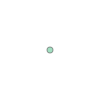

In [24]:
# Visualize geometry
sedf.SHAPE[0]

## Exercise : Change index of SHAPE

Replace [0] wtih [15]

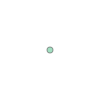

In [25]:
# Visualize geometry
sedf.SHAPE[15]

## Column Information

In [47]:
sedf.columns

Index(['FID', 'OBJECTID', 'CRASH_NUMB', 'CITY_TOWN_', 'CRASH_DATE',
       'CRASH_DA_1', 'CRASH_STAT', 'CRASH_SEVE', 'MAX_INJR_S', 'NUMB_VEHC',
       ...
       'DRIVER_VIO', 'NON_MTRS_3', 'NON_MTRS_4', 'NON_MTRS_5', 'NON_MTRS_6',
       'NON_MTRS_7', 'NON_MTRS_8', 'TRAFFIC_CO', 'SHAPE_1', 'SHAPE'],
      dtype='object', length=151)

In [26]:
new_sedf = sedf.loc[:,['CRASH_SEVE','NUMB_VEHC', 'TRAFFIC_CO','SHAPE']]
new_sedf

,CRASH_SEVE,NUMB_VEHC,TRAFFIC_CO,SHAPE
0,Property damage only (none injured),2,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
1,Property damage only (none injured),2,,"{""x"": 175799.5225000009, ""y"": 891002.076600000..."
2,Property damage only (none injured),2,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
3,Property damage only (none injured),2,,"{""x"": 175994.68299999833, ""y"": 893358.65329999..."
4,Property damage only (none injured),3,,"{""x"": 175639.38759999722, ""y"": 891405.46480000..."
...,...,...,...,...
6797,Property damage only (none injured),2,,"{""x"": 174673.46880000085, ""y"": 892618.37489999..."
6798,Property damage only (none injured),2,,"{""x"": 174673.46880000085, ""y"": 892618.37489999..."
6799,Non-fatal injury,3,,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."
6800,Non-fatal injury,3,,"{""x"": 173238.51539999992, ""y"": 889548.00010000..."


### Cursors in arcpy
- Cursors are in-memory objects used to iterate over and manipulate rows in feature classes or tables within a geodatabase. 
- They can read, update, or delete data efficiently. 

#### There are three main types of cursors
- SearchCursor(): Read only view of data from a table or feature class
- InsertCursor(): Adds rows to a table or feature class
- UpdateCursor(): Edit or delete rows in a table or feature class

### Describt(): Return Descriptive Information about a feature class
- arcpy.Describe(): https://pro.arcgis.com/en/pro-app/latest/arcpy/functions/describe-object-properties.htm

In [32]:
desc = arcpy.Describe("zip_Worcester")

In [33]:
print("The data type is:" + desc.datatype)

The data type is:ShapeFile


In [34]:
print("The shape type is:" + desc.shapetype)

The shape type is:Polygon


### List the column names

In [37]:
feature_class = "2024_Vehicle_Crash"
fields = arcpy.ListFields(feature_class)

# Print the name of each field
for field in fields:
    print(field.name)

OSError: "2024_Vehicle_Crash" does not exist

### SearchCursor
- [SearchCursor](https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/searchcursor-class.htm) is a read-only cursor object so it can't be used to insert of update existing records. You can only view the contents. 
- Loop through each record in the cursor

#### Iterate through a feature class and print the values of specific fields.
- with statement:This statement is used to open the cursor. 


In [ ]:
fields = ["SHAPE"]
with arcpy.da.SearchCursor(feature_class, fields) as cursor:
    for row in cursor:
        print(row)

In [76]:
fields = ["CRASH_DA_1", "NUMB_VEHC", "STREETNAME"]
with arcpy.da.SearchCursor(feature_class, fields) as cursor:
    for idx, row in enumerate(cursor):
        if idx < 20:
            print('On {}, there are {} vehicles that involved in traffic accident at {}'.format(row[0], row[1], row[2]))

On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-01-12 00:00:00, there 

## Exercise : Extract with filtering condition

get rows that with NUMB_VEHC > 10

In [81]:
fields = ["CRASH_DA_1", "NUMB_VEHC", "STREETNAME"]
with arcpy.da.SearchCursor(feature_class, fields) as cursor:
    for idx, row in enumerate(cursor):
        if row[1] > 5 :
            print('On {}, there are {} vehicles that involved in traffic accident at {}'.format(row[0], row[1], row[2]))

On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accident at INTERSTATE 290


#### Return a set of unique field values.

In [78]:
feature_class = "2024_Vehicle_Crash"
field = 'STREETNAME'
# Syntax 1:
values = []
for row in arcpy.da.SearchCursor(feature_class, field):
    values.append(row[0])
unique_values = set(values)    
print(unique_values)

{'SIGEL STREET', 'DEAN STREET', 'HIGGINS STREET', 'WHIPPLE STREET', 'HEARD STREET', 'CUTLER STREET', 'KELLEY SQUARE', 'RICHARDS STREET', 'CAMP STREET', 'MELROSE STREET', 'QUABOAG STREET', 'CHARLTON STREET', 'EATON PLACE', 'PIEDMONT STREET', 'OAK AVENUE', 'GODDARD MEMORIAL DRIVE', 'CHESTNUT STREET', 'MUSKEEGO STREET', 'SHERIDAN STREET', 'WALL STREET', 'PATTISON STREET', 'MERRICK STREET', 'STRATHMORE ROAD', 'LODI STREET', 'WAVERLY STREET', 'HARTWELL STREET', 'HOLLIS STREET', 'HAYNES STREET', 'SHAWMUT STREET', 'CAROLINE STREET', 'WEST STREET', 'MILLBROOK STREET', 'WASHINGTON SQUARE', 'NEW BOND STREET', 'HALMSTAD STREET', 'SHREWSBURY STREET', 'FERDINAND STREET', 'JAQUES AVENUE', 'IONIC AVENUE', 'NEWBURY STREET', 'LINCOLN STREET', 'INTERSTATE 290', 'NORTHEAST CUTOFF', 'HARRINGTON WAY', 'EASTERN AVENUE', 'COUNTRY CLUB BOULEVARD', 'THOMAS STREET', 'PRESTON STREET', 'BERKMANS STREET', 'DORCHESTER STREET', 'HIGHLAND STREET', 'CATHARINE STREET', 'BAILEY STREET', 'CLOVER STREET', 'BLAKE STREET', 

#### sorted() function to sort value
Use SearchCursor and the Python sorted method to sort rows.

In [91]:
sedf.columns

Index(['FID', 'OBJECTID', 'CRASH_NUMB', 'CITY_TOWN_', 'CRASH_DATE',
       'CRASH_DA_1', 'CRASH_STAT', 'CRASH_SEVE', 'MAX_INJR_S', 'NUMB_VEHC',
       ...
       'DRIVER_VIO', 'NON_MTRS_3', 'NON_MTRS_4', 'NON_MTRS_5', 'NON_MTRS_6',
       'NON_MTRS_7', 'NON_MTRS_8', 'TRAFFIC_CO', 'SHAPE_1', 'SHAPE'],
      dtype='object', length=151)

In [109]:
with arcpy.da.SearchCursor(feature_class, ("CRASH_DA_1", "NUMB_VEHC", "STREETNAME")) as cursor:
    for indx, row in enumerate(sorted(cursor)):
        if indx < 20:
            print('On {}, there are {} vehicles that involved in traffic accident {} '.format(row[0], row[1], row[2]))

On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident ASHWOOD STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident ASHWOOD STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident BLAKE STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident BLAKE STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident GOLD STAR BOULEVARD 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident GOLD STAR BOULEVARD 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident MAIN STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident SEVER STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that involved in traffic accident SEVER STREET 
On 2024-01-01 00:00:00, there are 2 vehicles that invo

## Exercise : Sorted from largest to smallest

Sort the rows based on NUMB_VEHC from largest to smallest

sorted(reverse = True)

In [110]:
with arcpy.da.SearchCursor(feature_class, ("NUMB_VEHC","STREETNAME", "CRASH_DA_1")) as cursor:
    for idx, row in enumerate(sorted(cursor, reverse = True)):
        if idx < 30:
            print('there are {} vehicles that involved in traffic accident at {} On {}  '.format(row[0], row[1], row[2]))

there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 10 vehicles that involved in traffic accident at INTERSTATE 290 On 2024-06-10 00:00:00  
there are 

#### Sort values by SQL
- SQL (Structured Query Language) is a standard language used for managing and manipulating relational databases. 
- [sql_clause](https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/searchcursor-class.htm) parameter in SearchCursor function
- sql_clause has prefix clause and postfix clause. 

ORDER BY clause is only suppoted when working with database

In [111]:
with arcpy.da.SearchCursor(feature_class, ("CRASH_DA_1", "NUMB_VEHC", "STREETNAME"),  sql_clause=(None,"ORDER BY NUMB_VEHC DESC")) as cursor:
    for index, row in enumerate(cursor):
        if index < 50:
            print('On {}, there are {} vehicles that involved in traffic accidents at {} '.format(row[0], row[1], row[2]))

On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-05 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-07 00:00:00, there are 2 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-02 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01-04 00:00:00, there are 3 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-01

## Exericise: ORDRE BY for data in database

1. define the path of shapefile (T2024_Vehicle_Crash) in geodatabase

In [39]:
feature_class_gdb = 'E:\Clark\Spring2025\Github_Courses\LargeFiles_geog386\docs\Lectures\Week05_arcpy\zip_MA\ZIP_ma.gdb\T2024_Vehicle_Crash'
with arcpy.da.SearchCursor(feature_class_gdb, ("CRASH_DA_1", "NUMB_VEHC", "STREETNAME"),  sql_clause=(None,"ORDER BY NUMB_VEHC DESC")) as cursor:
    for index, row in enumerate(cursor):
        if index < 50:
            print('On {}, there are {} vehicles that involved in traffic accidents at {} '.format(row[0], row[1], row[2]))

On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 


### Exercise 1: Sort value based on Two Columns

Sorts the feature_class_gdb by:

First, Number of vehicles involved (NUMB_VEHC) in descending order
Second, Crash date (CRASH_DA_1) in ascending order (most recent first)

In [40]:
with arcpy.da.SearchCursor(feature_class_gdb, ("CRASH_DA_1", "NUMB_VEHC", "STREETNAME"),  sql_clause=(None, 'ORDER BY NUMB_VEHC DESC, CRASH_DA_1 ASC')) as cursor:
    for index, row in enumerate(cursor):
        if index < 30:
            print('On {}, there are {} vehicles that involved in traffic accidents at {} '.format(row[0], row[1], row[2]))

On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 
On 2024-06-10 00:00:00, there are 10 vehicles that involved in traffic accidents at INTERSTATE 290 


## UpdateCursor

In [152]:
feature_class = "2024_Vehicle_Crash"

new_field_name = 'surface'
field_type = 'TEXT'
arcpy.AddField_management(feature_class, new_field_name, field_type)

fields_update = ['ROAD_SURF_', new_field_name]

# Create update cursor for feature class 
with arcpy.da.UpdateCursor(feature_class, fields_update) as cursor:
    for row in cursor:
        if row[0] is not None and row[0] in ['Other', 'Unknown']:
            row[1] = 'Other'l
        else:
            row[1] = 'Source'

        # Update the cursor with the updated list
        cursor.updateRow(row)

## InsertCursor

### InsertCursor(): Inserting Rows with InsertCursor

#### check the number of columns and rows

In [116]:
feature_class = "2024_Vehicle_Crash"
desc = arcpy.Describe(feature_class)

# Get the number of fields (columns)
num_columns = len(desc.fields)

# Get the number of rows
with arcpy.da.SearchCursor(feature_class, "*") as cursor:
    num_rows = sum(1 for rows in cursor)
    
print('columns: {}'.format(num_columns))
print('rows: {}'.format(num_rows))

columns: 151
rows: 6802


In [122]:
feature_class = "2024_Vehicle_Crash"
fields = ["STREETNAME", "DRIVER_AGE", 'SHAPE'] 

points_data = [{'STREETNAME': 'Main Street', 'DRIVER_AGE': '50', 'SHAPE': (-71.791180, 42.249540)}]

### Step 1: Create Point

The * (asterisk) unpacks the tuple (-71.791180, 42.249540), passing its values as separate arguments.

Equivalent to: 

point = arcpy.Point(-71.791180, 42.249540)

In [125]:
point = arcpy.Point(*points_data[0]['SHAPE'])  # Unpack coordinates
# point_geometry = arcpy.PointGeometry(point)

## Step 2: Define projection

In [126]:
point_geometry = arcpy.PointGeometry(point, arcpy.SpatialReference(4326))  # Initial SR: WGS 84

# Project the point geometry to the desired coordinate system
# Define the coordinate system for projection (WKID 26986)
spatial_reference = arcpy.SpatialReference(26986)  # NAD83 / UTM Zone 18N

projected_geometry = point_geometry.projectAs(spatial_reference)

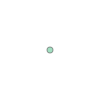

In [127]:
projected_geometry

## Step 3: Add new point to feature class

In [128]:
# Use InsertCursor to insert new rows
with arcpy.da.InsertCursor(feature_class, fields) as cursor:
    for point_info in points_data:
        cursor.insertRow([point_info['STREETNAME'], point_info['DRIVER_AGE'], projected_geometry])